# 1a. Aproximacion a la funcion 3sen(pi x)

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [2]:
#HERENCIA, se crea una clase a partir de otra clase, esta nueva clase contiene todo lo de la antigua clase.
#1a seno
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            
            x_1 = tf.ones((batch_size, 1))
            y_1 = self(x_1, training = True)

            x_2 = tf.ones((batch_size, 1))/2
            y_pi_2 = self(x_2, training = True)
            
            x_m_1 = -tf.ones((batch_size, 1))
            y_m_1 = self(x_m_1, training = True)

            x_m_2 = -tf.ones((batch_size, 1))/2
            y_m_pi_2 = self(x_m_2, training = True)
            #funcion de costo, la funcion 3sen(pi x)
            eq = y_pred-3*tf.sin(math.pi*x)
            
            #Agregamos algunas condiciones iniciales
            ic_0 = y_o -0.
            ic_1 = y_1 - 0. 
            ic_m_1 = y_m_1 - 0. 
            ic_2 = y_pi_2 - 3.
            ic_m_2 = 3. + y_m_pi_2  
            
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic_0) + keras.losses.mean_squared_error(0., ic_1) + keras.losses.mean_squared_error(0., ic_m_1)+ keras.losses.mean_squared_error(0., ic_2) #+ keras.losses.mean_squared_error(0., ic_m_2)
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial de la funcion de costo 
        return  {"loss": self.loss_tracker.result()}
            
            

In [6]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [7]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 500, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)



Epoch 1/500
4/4 [==============================] - 2s 1ms/step - loss: 13.1760
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 12.2065
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 11.5762
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 11.6898
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 11.3221
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 11.3549
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 10.7336
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 11.5017
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 11.3142
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 10.6195
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 10.6634
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 10.8207
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 2ms/step - loss: 1.0695
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8914
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 1.1197
Epoch 107/500
4/4 [==============================] - 0s 998us/step - loss: 1.1186
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0764
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9713
Epoch 110/500
4/4 [==============================] - 0s 3ms/step - loss: 0.9372
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8100
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0880
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8821
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9085
Epoch 115/500
4/4 [==============================] - 0s 1ms/step - loss: 0.8887
Epoch 116/500
4/4 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 0.3769
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6080
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4295
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4737
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5125
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5000
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4524
Epoch 213/500
4/4 [==============================] - 0s 998us/step - loss: 0.4735
Epoch 214/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7062
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5732
Epoch 216/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4156
Epoch 217/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4953
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 3ms/step - loss: 0.5656
Epoch 309/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5173
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3124
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3971
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4363
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4297
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5704
Epoch 316/500
4/4 [==============================] - 0s 997us/step - loss: 0.5301
Epoch 317/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 318/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5995
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3535
Epoch 320/500
4/4 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4896
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4807
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4366
Epoch 416/500
4/4 [==============================] - 0s 997us/step - loss: 0.3246
Epoch 417/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3784
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2955
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 421/500
4/4 [==============================] - 0s 998us/step - loss: 0.5871
Epoch 422/500
4/4 [==============================]

In [ ]:
#model.save("rna_edo_solver1")

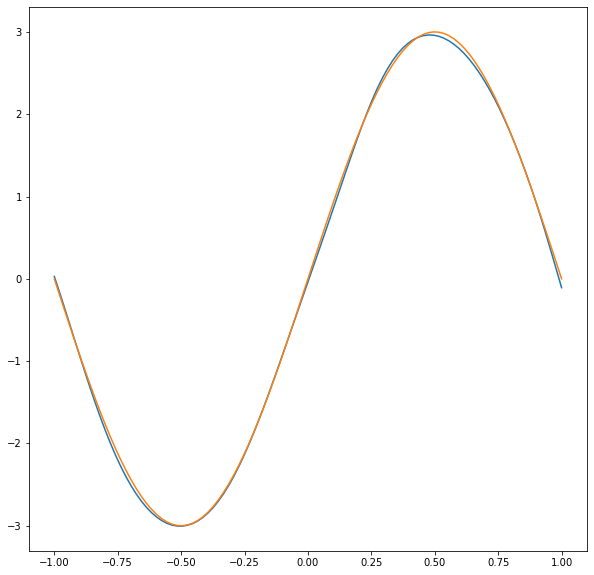

In [8]:
plt.figure(figsize = (10,10))

plt.plot(x_testv, a)
plt.plot(x_testv, 3*np.sin(math.pi*x))

plt.show()
